In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv("netflix_titles.csv")

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.shape

(8807, 12)

In [9]:
df.shape  # Rows, Columns
df.info()  # Column names, types, null values
df.describe(include='all')  # Summary
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Check for nulls
df.isnull().sum()

# Fill or drop nulls (for this project, dropping is fine)
df.dropna(subset=['director', 'cast', 'country', 'date_added'], inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year
df['year_added'] = df['date_added'].dt.year

# Check 'duration'
df['duration'].value_counts().head()


ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1179. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

# Assistant
The error occurs when trying to convert the 'date_added' column to datetime format. The issue is that some date strings in the column have extra spaces at the beginning, which causes the datetime conversion to fail.

Would you like me to provide the corrected code?

In [11]:
# Check for nulls
df.isnull().sum()

# Fill or drop nulls (for this project, dropping is fine)
df.dropna(subset=['director', 'cast', 'country', 'date_added'], inplace=True)

# Convert 'date_added' to datetime - strip whitespace before conversion
df['date_added'] = df['date_added'].str.strip()  # Remove leading/trailing whitespace
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year
df['year_added'] = df['date_added'].dt.year

# Check 'duration'
df['duration'].value_counts().head()

duration
94 min    135
93 min    130
97 min    129
95 min    127
90 min    123
Name: count, dtype: int64

C:\Users\SHREYA\AppData\Local\Temp\ipykernel_39892\3017024823.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


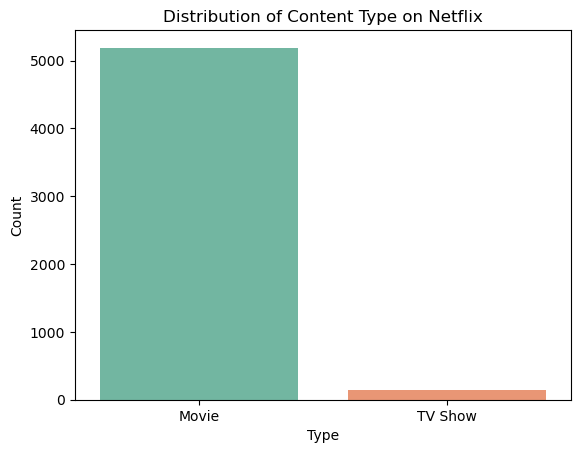

In [12]:
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()



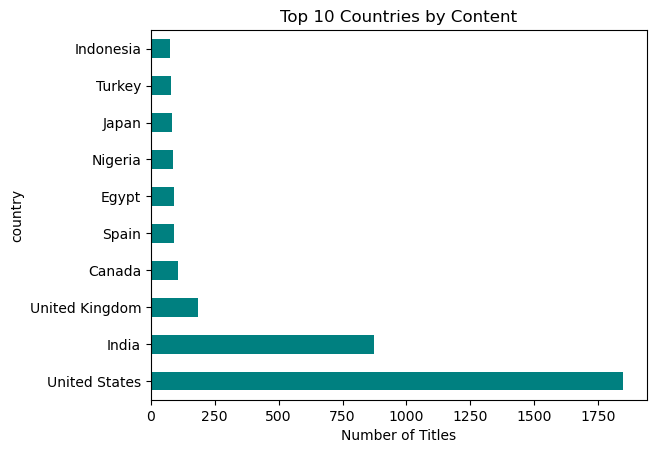

In [13]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='teal')
plt.title("Top 10 Countries by Content")
plt.xlabel("Number of Titles")
plt.show()


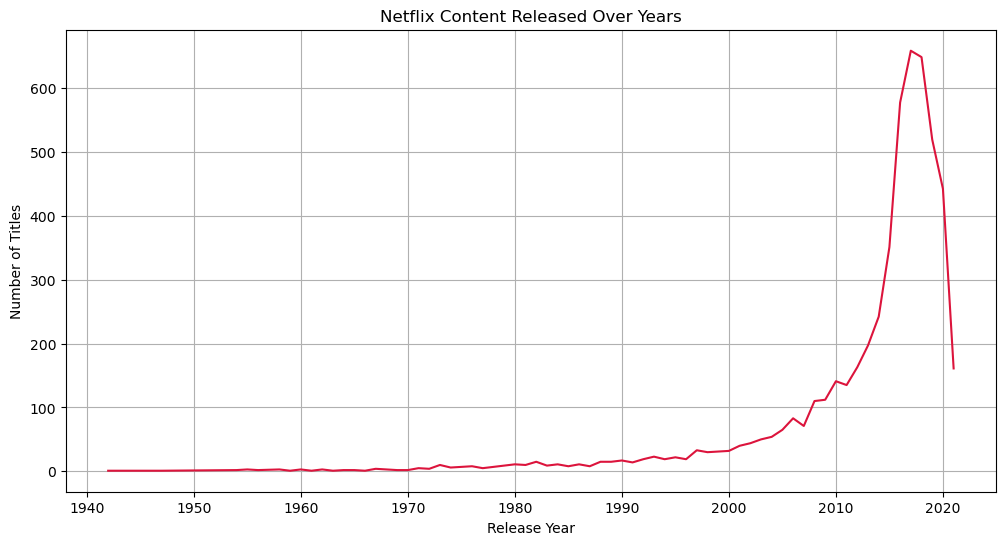

In [14]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6), color='crimson')
plt.title("Netflix Content Released Over Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid()
plt.show()


C:\Users\SHREYA\AppData\Local\Temp\ipykernel_39892\3472856132.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='magma')


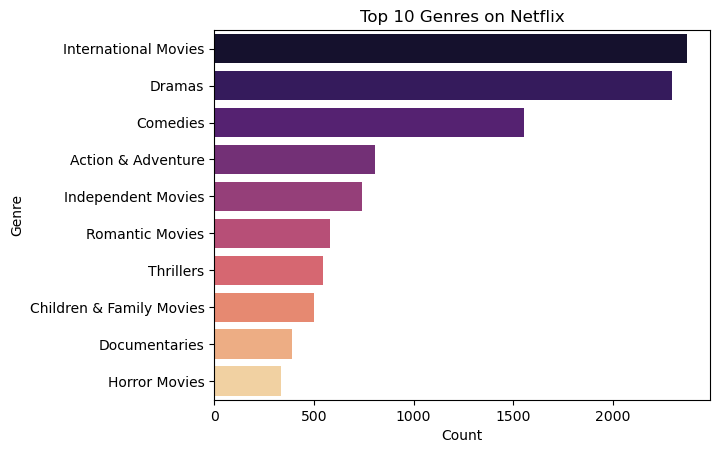

In [15]:
# Split genres from 'listed_in' column
from collections import Counter

genres = df['listed_in'].str.split(', ')
all_genres = [genre for sublist in genres.dropna() for genre in sublist]
genre_counts = Counter(all_genres).most_common(10)

# Plot
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])
sns.barplot(x='Count', y='Genre', data=genre_df, palette='magma')
plt.title("Top 10 Genres on Netflix")
plt.show()


C:\Users\SHREYA\AppData\Local\Temp\ipykernel_39892\133974988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)


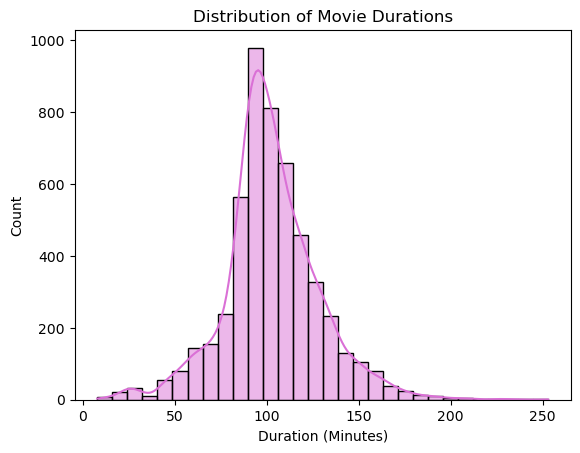

In [16]:
# Filter only movies
movies = df[df['type'] == 'Movie']

# Clean duration (e.g., "90 min" → 90)
movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)

# Plot
sns.histplot(movies['duration_mins'], bins=30, kde=True, color='orchid')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (Minutes)")
plt.show()
